### Closed-form Linear Regression
1. Tulis function lr_closed_form(x_train, y_train)yang menghitung
Closed-form least-squares solution linear regression, dengan persamaan solusi sebagai
berikut :
Dimana : <br>
● x_train merupakan matrik fitur yang berukuran N x D, dengan N jumlah sampel
dan D dimensi fitur dari data train. <br>
● y_train merupakan vektor label yang berukuran N x 1 dari data train, dengan
label ke-i dari sampel y_train harus sesuai dengan baris ke-i dari x_train <br>
● output dari function ini merupakan vektor weight dengan ukuran 1 x D, dengan D
dimensi fitur.


In [1]:
import numpy as np
import numpy.linalg as linalg


'''
Close function to obtain the ideal weight:
ideal_theta = (X^T.X)^-1.X^T.y
'''
def lr_closed_form(x_train, y_train):
    #finding (X^T.X)^-1
    xt_x_inverse = linalg.inv(np.matmul(np.transpose(x_train), x_train))
    #finding X^T.y
    xt_y = np.matmul(np.transpose(x_train), y_train)
    #matrix multiplication (X^T.X)^-1 and X^T.y
    optimum_theta = np.matmul(xt_x_inverse, xt_y)
    return optimum_theta

2. Tulis function lr_predict(x_test, weight) yang menghitung
Dimana : <br>
● x_test merupakan matrik fitur yang berukuran N x D, dengan N jumlah sampel
dan D dimensi fitur dari data test.<br>
● weight merupakan vektor weight yang berukuran 1 x D, dengan D dimensi fitur. <br>
● output dari function ini merupakan vektor label y_pred berukuran N x 1 yang
merupakan prediksi laber dari data test.<br>

In [2]:
'''
- iterate each item in test set
- Compute prediction = WX + bias, W = [w1, w2,..., wd] is the weight
'''
def lr_predict(x_test, weight):
    prediction = np.array([np.dot(weight, x) for x in x_test])
    return prediction

3. Lakukan pembacaan data dan pre-proses pada dataset Diabetes (load dari sklearn).<br>
Gunakan fitur hanya dari kolom **‘bmi’** dan **‘bp’** serta label data dari kolom <br> 
**‘diabetes_measure’**. Lakukan pre-poses pada fitur data tersebut meliputi normalisasi <br>
data menggunakan z-score dan menambahkan kolom bias yang mempunyai nilai 1 <br>
disetiap barisnya secara manual (tanpa library).


## Asumsi: Data yang tergolong outliers tidak dibuang dan dilibatkan dalam proses training dan testing

In [3]:
import sklearn.datasets as dataset
import pandas as pd

#load raw data 
diabetes_dataset = dataset.load_diabetes()

#convert data into Pandas Dataframe 
pd_diabetes = pd.DataFrame(data= np.c_[diabetes_dataset['data'], diabetes_dataset['target']],
                     columns= diabetes_dataset['feature_names'] + ['target'])


#fetch bmi column and convert it in to N X 1 
bmi = pd_diabetes['bmi'].to_numpy().reshape(-1, 1)

#fetch bp column and convert it in to N X 1 
bp = pd_diabetes['bp'].to_numpy().reshape(-1, 1)

#fetch "diabetes_measure" from target column and convert it in to N X 1 
y = pd_diabetes['target'].to_numpy()

#Create array of ones sized N X 1
bias = np.ones((y.shape[0], 1))


# Function for z normalization
# This function is applied for N X 1 numpy array
# return normalized form of numpy array
# X_{i}' = (X_{i} - mean of X) / SD of X
def normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / (std + 1e-16), mean, std

#store mean and std of target to convert prediction later
#normalized bmi and bp array
normalized_bmi, mean_bmi, sd_bmi = normalize(bmi)
normalized_bp, mean_bp, sd_bp = normalize(bp)
y, mean_y, sd_y = normalize(y)

# stack bmi, bp, and bias array horizontally
normalized_X = np.hstack((normalized_bmi, normalized_bp, bias))

print(normalized_X)
print(y)

[[ 1.29708846  0.45983993  1.        ]
 [-1.08218016 -0.55351103  1.        ]
 [ 0.93453324 -0.11921776  1.        ]
 ...
 [-0.33441002  0.36333032  1.        ]
 [ 0.82123474  0.02554666  1.        ]
 [-1.53537419 -1.71162641  1.        ]]
[-1.47194752e-02 -1.00165882e+00 -1.44579915e-01  6.99512942e-01
 -2.22496178e-01 -7.15965848e-01 -1.83538046e-01 -1.15749134e+00
 -5.47147277e-01  2.05006151e+00 -6.64021672e-01 -1.07957508e+00
  3.48889755e-01  4.26806019e-01 -4.43258925e-01  2.45001404e-01
  1.80071184e-01 -1.05621783e-01 -7.15965848e-01  2.06043272e-01
 -1.09256112e+00 -1.33929596e+00 -1.09256112e+00  1.20596866e+00
  4.13819975e-01  6.47568766e-01 -1.96524090e-01 -8.71798376e-01
 -2.74440354e-01  1.69943833e+00 -3.00412442e-01 -1.20943552e+00
  2.45262887e+00 -8.45826288e-01 -1.13151925e+00 -6.51035629e-01
  1.46568953e+00  1.60853602e+00  1.29687096e+00 -8.06868156e-01
 -6.77007716e-01 -1.26137969e+00 -1.18346343e+00 -7.80896068e-01
  1.38777327e+00 -1.28735178e+00  4.91736239e

4. Lakukan pembagian data train dan data test secara random dan manual (tanpa library)
dengan persentase rasio 60% : 40%

In [4]:
'''
function to split dataset in to training set and test set
parameter:
- split_ratio --> weight value to determine the size of training set and test set
- data --> predictor attribute of data
- target --> label of dataset
'''

def split_data(split_ratio, data, target):
    
    #copy data and target in new variables
    shuffled_data = data
    shuffled_target = target
    
    #determine the size of training size
    train_size = int(split_ratio * data.shape[0]) 
    
    #shuffled data and target to ensure the randomness
    np.random.shuffle(shuffled_data)
    np.random.shuffle(shuffled_target)
    
    #split the data based on training size
    data_train = shuffled_data[:train_size]
    data_test = shuffled_data[train_size:]
    
    #split the target based on training size
    target_train = shuffled_target[:train_size]
    target_test = shuffled_target[train_size:]
    
    
    return data_train, data_test, target_train, target_test

X_train, X_test, y_train, y_test = split_data(0.6, normalized_X, y)

print(X_train)
print()
print()
print(X_test)
print()
print()
print(y_train)
print()
print()
print(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[-1.17281897e+00 -4.68355485e-02  1.00000000e+00]
 [-1.08218016e+00 -5.53511027e-01  1.00000000e+00]
 [ 1.18783999e-01  6.76986564e-01  1.00000000e+00]
 [ 4.81339219e-01  1.03889762e+00  1.00000000e+00]
 [-3.98339091e-02  1.40080868e+00  1.00000000e+00]
 [-5.38347336e-01 -2.63982182e-01  1.00000000e+00]
 [-3.11750324e-01  1.23191685e+00  1.00000000e+00]
 [ 1.41443701e-01  5.32222142e-01  1.00000000e+00]
 [-3.57069726e-01 -2.63982182e-01  1.00000000e+00]
 [ 1.45570637e+00  1.25604425e+00  1.00000000e+00]
 [ 1.04783175e+00  3.87457719e-01  1.00000000e+00]
 [ 1.36506757e+00  7.49368775e-01  1.00000000e+00]
 [ 3.45381011e-01  4.59839930e-01  1.00000000e+00]
 [ 5.08048957e-02  1.18366204e+00  1.00000000e+00]
 [ 9.34533243e-01 -4.08746605e-01  1.00000000e+00]
 [ 1.86763103e-01  8.94133198e-01  1.00000000e+00]
 [-6.74305543e-01 -5.53511027e-01  1.00000000e+00]
 [-1.75792116e-01 -5.53511027e-01  1.00000000e+00]
 [-1.49005479e+00 -4.81128816e-01  1.00000000e+00]
 [-1.53537419e+00 -1.71162641e+

5. Implementasikan function lr_closed_form(x_train,y_train) dan
lr_predict(x_test,weight) pada data train dan data test.


In [5]:
#finding the ideal norm from data training using closed function
norm_diabetes = lr_closed_form(X_train, y_train)
print(norm_diabetes)
print()

#predict the diabetes measure using function lr_predict(X_test, weight)
prediction = lr_predict(X_test, norm_diabetes)
print(prediction)

[ 0.03668067 -0.04843707 -0.02977779]

[-0.0395943  -0.02233477 -0.06842879 -0.00869034  0.07333358 -0.02395257
  0.01411391 -0.03326296 -0.00146635 -0.03019483 -0.01710809 -0.17484656
 -0.01964615 -0.01609562 -0.08571594 -0.09283392 -0.03879386  0.02860643
  0.03178057 -0.01205958 -0.052257   -0.0005599  -0.03557518 -0.09844011
 -0.01949559  0.01754461 -0.02000873 -0.00182894  0.01302617  0.01396335
 -0.02025149 -0.0098841  -0.09887797  0.05795406 -0.00914201  0.03709945
 -0.01822656 -0.04961292 -0.00905857 -0.09168471 -0.0765285  -0.05351222
  0.01751388 -0.04790603 -0.06472459 -0.00089175 -0.09120231 -0.03206356
 -0.01954014  0.02452584 -0.02825899 -0.05195589  0.08648743  0.02898029
  0.00185834 -0.03185718 -0.02726345 -0.07038661 -0.07776679 -0.10067706
 -0.04718087  0.00128373 -0.11155759  0.06422141 -0.02213967  0.0054396
  0.00793312 -0.03850656 -0.02362072 -0.03944375 -0.03403266 -0.00034788
 -0.02687014  0.05100356 -0.04748198 -0.05343694 -0.01472058 -0.0314946
 -0.00447301 -

6. Hitung L2 norm, MSE, dan RSS secara manual (tanpa library) dari vektor prediksi
y_pred dan vektor ground-thruth y_test. Tampilkan hasil L2 norm, MSE, dan RSS
beserta analisa hasil yang telah Anda peroleh.


In [6]:
'''
function to compute MSE:
MSE(y, y') = 1/n * \sum_{i = 1}^{n} ((y_{i} - y'_{i})^2)
'''
def MSE(prediction, ground_truth):
    return np.sum(np.square(prediction - ground_truth)) / prediction.shape[0]

'''
function to compute MSE:
RSS(y, y') = \sum_{i = 1}^{n} ((y_{i} - y'_{i})^2)
'''
def RSS(prediction, ground_truth):
    return np.sum(np.square(prediction - ground_truth))

'''
function to compute L2_norm:
L2_norm(y, y') = sqrt(\sum_{i = 1}^{n} ((|y_{i} - y'_{i}|)^2))
'''
def l2_norm(prediction, ground_truth):
    return np.sqrt(np.sum(np.square(np.abs(prediction - ground_truth))))

MSE_closed = MSE(prediction, y_test)
RSS_closed = RSS(prediction, y_test)
l2_norm_closed = l2_norm(prediction, y_test)

print("MSE closed function: " + str(MSE_closed))
print("RSS closed function: " + str(RSS_closed))
print("L2 norm closed function: " + str(l2_norm_closed))

MSE closed function: 1.099124401960763
RSS closed function: 194.5450191470551
L2 norm closed function: 13.94793960221563


7. Visualisaikan hasil regresi menggunakan scatter plot dan lakukan observasi apakah
metode regresi linier dapat efektif digunakan untuk memprediksi data pada dataset
tersebut?
**jawab:**

    Jika berbicara mengenai lamanya waktu training maka metode closed function cukup efektif karena membutuhkan waktu komputasi yang singkat. Namun hasil prediksinya tidak selalu dapat dijamin baik, terutama bila data train banyak mengandung outlier. Outlier dapat memberi hasil yang buruk pada metode closed function. Hasil regresi yang ditampilkan menunjukkan bahwa regresi menggunakan closed function belum memberi hasil yang maksimal.



## Asumsi: Grafik yang ditampilkan dalam representasi ternormalisasi

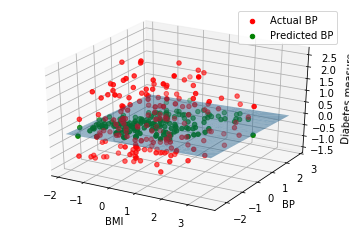

In [7]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

'''
function to visualize the regression
the function using matplotlib library to visualize the regression
'''
def visualize(X_test, y_test, norm, prediction):
    #prepare the test set, prediction, and the weight for plotting
    xx, yy, zz = np.meshgrid(X_test[:, 0], X_test[:, 1], X_test[:, 2])
    combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
    Z = combinedArrays.dot(norm)
    
    fig = plt.figure(2)
    ax = fig.add_subplot(111, projection='3d')
    #plot the ground thruth with red dot
    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='r', label='Actual BP')
    #plot the prediction with green dot
    ax.scatter(X_test[:, 0], X_test[:, 1], prediction, color='g', label='Predicted BP')
    #plot the plane which is parameterized by the weight of the model
    ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
    ax.set_xlabel('BMI')
    ax.set_ylabel('BP')
    ax.set_zlabel('Diabetes measure')
    ax.legend()
    plt.show()
    
visualize(X_test, y_test, norm_diabetes, prediction)

### C. Batch Gradient-descent Regression
8. Tulis function bacth_grad(learning_rate, x_train, y_train, epoch) yang
menghitung batch gradient-descent regression, dimana : <br>
● Learning_rate merupakan parameter learning rate <br>
● Epoch merupakan parameter jumlah iterasi <br>
● x_train merupakan matrik fitur yang berukuran N x D, dengan N jumlah sampel
dan D dimensi fitur dari data train. <br>
● y_train merupakan vektor label yang berukuran N x 1 dari data train, dengan
label ke-i dari sampel y_train harus sesuai dengan baris ke-i dari x_train <br>
● output dari function ini merupakan vektor weight dengan ukuran 1 x D, dengan D
dimensi fitur. <br>

In [8]:
'''
Linear regression using gradient descent
cost-function = MSE(y', y) = 1/ n * \sum_{i=1}^{n} (y_{i} - y'_{i})^2

'''

def batch_grad(learning_rate, X_train, y_train, epoch):
    #initialize the weight by random manner
    weight = np.random.rand(X_train.shape[1], )
    
    #update the weight for [epoch] times
    for i in range(epoch):
        #predict the train data with current weight
        prediction = np.array([np.dot(weight, x) for x in X_train])
        
        #create an array to keep the gradient with respect to each weight of model for a particular iteration
        cost_derivative = np.zeros(X_train.shape[1], )
        #compute the residual error
        residual_error =  y_train - prediction
        
        #find the derivation of MSE w.r.t. each of weight of the model
        for j in range(X_train.shape[1]):
            #find the j-th column of the data training
            x_j = X_train[:, j]
            #compute the MSE gradient w.r.t. wj:
            #d(MSE) / d(wj) = -2 / n * \sum_{i=1}^{n} ((prediction - ground_truth) * xj)
            cost_derivative_j = (-2 / X_train.shape[0]) * np.sum(residual_error * x_j)
            #store the derivative in to cost_derivative array
            cost_derivative[j] = cost_derivative_j
        
        #after finding all of the gradient, update the weight by:
        weigth = weight - learning_rate * cost_derivative
    
    return weight

9. Tulis function bacth_grad_predict(x_test, weight)yang digunakan untuk
memprediksi label untuk sampel baru.<br>
Dimana :<br>
● x_test merupakan matrik fitur yang berukuran N x D, dengan N jumlah sampel
dan D dimensi fitur dari data test. <br>
● weight merupakan vektor weight yang berukuran 1 x D, dengan D dimensi fitur. <br>
● output dari function ini merupakan vektor label y_pred berukuran N x 1 yang
merupakan prediksi laber dari data test. <br>

In [9]:
#predict the test set using the weight gained from the trainig phase
#iterate each of the test-set and perform dot.product between test vector and the weight of the model
def batch_grad_predict(x_test, weight):
    return np.array([np.dot(weight, x) for x in x_test])

10. Implementasikan function bacth_grad(x_train,y_train) dan
bacth_grad_predict(x_test,weight) pada data train dan data test yg telah dibagi
dan di lakukan pre-proses pada poin A sebelumnya.

In [10]:
#choose epoch = 2000 and lr = 0.02
epoch = 2000
lr = 0.02

norm_diabetes_gd = batch_grad(lr, X_train, y_train, epoch)
print(norm_diabetes_gd)

prediction_gd = batch_grad_predict(X_test, norm_diabetes_gd)
print(prediction_gd)


[0.07793086 0.53414664 0.34985118]
[ 0.25304699  1.39639074 -0.0848827  -0.14240961 -0.18333029  0.74739344
 -0.18618313 -0.28683886  0.14960695 -0.00365176 -0.3447395   1.81015093
  0.29542835 -0.38869989  0.89284111  0.78549555 -0.16025538 -0.24761554
  0.22024255  0.49599236  1.3328187  -0.07902443 -0.33786281  1.1424763
 -0.16536618  0.00555143  0.3868809   0.2410595   0.08817453  0.27461141
 -0.39752934 -0.05272295  1.46432612 -0.46193293  1.23997399 -0.27568292
 -0.48545011  0.87732183 -0.5428244   1.34127441  0.26680038  0.59236884
 -0.40951683  0.23538809  1.30633035  0.42749638  0.37395907  0.11534182
  0.48009935 -0.48684226  1.19935852  0.41122963  0.79758583  0.6446666
  0.15667051 -0.00718354 -0.32020391  1.32504193  1.00195256  0.86105509
  0.05248299 -0.12121893  1.06849578  0.21231318  0.29013068 -0.11238948
 -0.10709181 -0.02131066  0.24087263 -0.20774754  0.54153176  0.29031755
  0.0034118   0.44552901  0.97407206  0.36197158 -0.52411282 -0.09863609
  0.69655636  1.13

In [11]:
MSE_gd = MSE(prediction_gd, y_test)
RSS_gd = RSS(prediction_gd, y_test)
l2_norm_gd = l2_norm(prediction_gd, y_test)

print("MSE gradient descent (lr:0.02): " + str(MSE_gd))
print("RSS gradient descent (lr:0.02): " + str(RSS_gd))
print("L2 norm gradient descent (lr:0.02): " + str(l2_norm_gd))

MSE gradient descent (lr:0.02): 1.3298864413313078
RSS gradient descent (lr:0.02): 235.3899001156415
L2 norm gradient descent (lr:0.02): 15.34242158577457


11. Visualisaikan hasil garis regresi pada dataset diabetes menggunakan scatter plot untuk
learning rate (0.5, 0.1, 0.005, 0.001, 0.0001) dan lakukan analisa terhadap hasil yang
Anda peroleh?
**jawab:**
GD (lr = 0.5):<br>
MSE gradient descent lr(0.5): 3.078896981209198<br>
RSS gradient descent lr(0.5): 544.9647656740281<br>
L2 norm gradient descent lr(0.5): 23.344480411309824<br>

GD (lr = 0.1):<br>
MSE gradient descent lr(0.1): 1.3661582961144667<br>
RSS gradient descent lr(0.1): 241.8100184122606<br>
L2 norm gradient descent lr(0.1): 15.55024174771121<br>

GD (lr = 0.005):<br>
MSE gradient descent lr(0.005): 2.889356938554909<br>
RSS gradient descent lr(0.005): 511.41617812421896<br>
L2 norm gradient descent lr(0.005): 22.61451255552989<br>

GD (lr = 0.001):<br>
MSE gradient descent lr(0.001): 1.4775268088447469<br>
RSS gradient descent lr(0.001): 261.5222451655202<br>
L2 norm gradient descent lr(0.001): 16.171649426249637<br>

GD (lr = 0.0001):<br>
MSE gradient descent lr(0.0001): 1.7355516607445296<br>
RSS gradient descent lr(0.0001): 307.19264395178175<br>
L2 norm gradient descent lr(0.0001): 17.5269119913287<br>

Gradient descent bekerja paling baik ketika menggunakan learning rate sebesar 0.1<br>
Gradient descent bekerja paling buruk ketika menggunakan learning rate sebesar 0.5<br>
Learning rate yang kecil tidak menjamin konvergensi training pada model.<br>
Ada kemungkinan nilai learning rate yang besar menyebabkan nilai loss function mengalami osilasi sehingga sulit mencapai titik konvergen.<br>
Ada kemungkinan nilai learning rate yang terlalu kecil menyebabkan nilai loss function cenderung stagnan atau tidak bergerak karena pergeserannya terlalu kecil.<br>

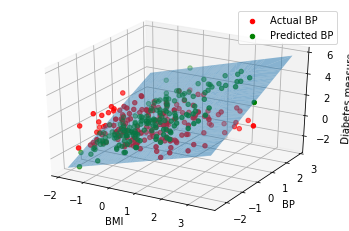

MSE gradient descent lr(0.5): 3.078896981209198
RSS gradient descent lr(0.5): 544.9647656740281
L2 norm gradient descent lr(0.5): 23.344480411309824


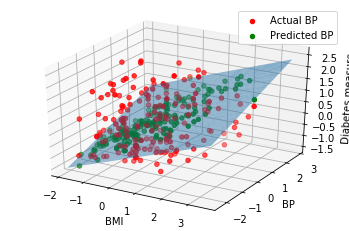

MSE gradient descent lr(0.1): 1.3661582961144667
RSS gradient descent lr(0.1): 241.8100184122606
L2 norm gradient descent lr(0.1): 15.55024174771121


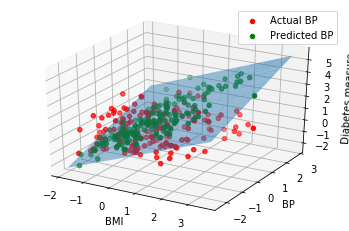

MSE gradient descent lr(0.005): 2.889356938554909
RSS gradient descent lr(0.005): 511.41617812421896
L2 norm gradient descent lr(0.005): 22.61451255552989


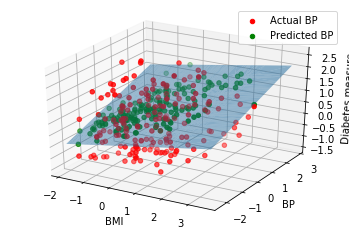

MSE gradient descent lr(0.001): 1.4775268088447469
RSS gradient descent lr(0.001): 261.5222451655202
L2 norm gradient descent lr(0.001): 16.171649426249637


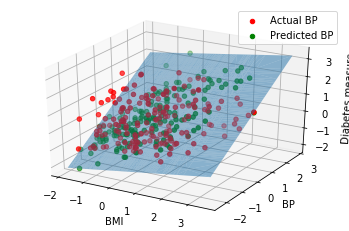

MSE gradient descent lr(0.0001): 1.7355516607445296
RSS gradient descent lr(0.0001): 307.19264395178175
L2 norm gradient descent lr(0.0001): 17.5269119913287


In [12]:
#keep all the possible lr in an array
learning_rates = [0.5, 0.1, 0.005, 0.001, 0.0001]
#for each of learning rate, train the model and keep the weight in an array
norm_gds = [batch_grad(lr, X_train, y_train, epoch) for lr in learning_rates]
counter = 0

'''
for each of model:
predict the test set, find the error, and visualize the regression
'''
for norm in norm_gds:
    prediction = batch_grad_predict(X_test, norm)
    visualize(X_test, y_test, norm, prediction)
    
    MSE_gd = MSE(prediction, y_test)
    RSS_gd = RSS(prediction, y_test)
    l2_norm_gd = l2_norm(prediction, y_test)

    print("MSE gradient descent lr(" + str(learning_rates[counter]) + "): " + str(MSE_gd))
    print("RSS gradient descent lr(" + str(learning_rates[counter]) + "): " + str(RSS_gd))
    print("L2 norm gradient descent lr(" + str(learning_rates[counter]) + "): " + str(l2_norm_gd))
    
    counter += 1

12. Bandingkan hasil regresi yang anda peroleh dari penggunaan metode Closed-form
Least-squares Solution Linear regression dan Batch Gradient-descent Regression.
**Jawab:** <br>
Closed-Function:<br>
MSE closed function: 1.099124401960763<br>
RSS closed function: 194.5450191470551<br>
L2 norm closed function: 13.94793960221563<br>

GD (lr = 0.5):<br>
MSE gradient descent lr(0.5): 3.078896981209198<br>
RSS gradient descent lr(0.5): 544.9647656740281<br>
L2 norm gradient descent lr(0.5): 23.344480411309824<br>

GD (lr = 0.1):<br>
MSE gradient descent lr(0.1): 1.3661582961144667<br>
RSS gradient descent lr(0.1): 241.8100184122606<br>
L2 norm gradient descent lr(0.1): 15.55024174771121<br>

GD (lr = 0.005):<br>
MSE gradient descent lr(0.005): 2.889356938554909<br>
RSS gradient descent lr(0.005): 511.41617812421896<br>
L2 norm gradient descent lr(0.005): 22.61451255552989<br>

GD (lr = 0.001):<br>
MSE gradient descent lr(0.001): 1.4775268088447469<br>
RSS gradient descent lr(0.001): 261.5222451655202<br>
L2 norm gradient descent lr(0.001): 16.171649426249637<br>

GD (lr = 0.0001):<br>
MSE gradient descent lr(0.0001): 1.7355516607445296<br>
RSS gradient descent lr(0.0001): 307.19264395178175<br>
L2 norm gradient descent lr(0.0001): 17.5269119913287<br>

 1. Proses *training* pada gradient descent berjalan lebih lama dibandingkan dengan *closed function*. <br>
 2. Hasil regresi pada test set menggunakan gradient descent dapat berubah - ubah bergantung pada learning rate yang digunakan <br>
 3. Hasil regresi menggunakan closed function lebih baik dibandingkan dengan gradient descent. Hal ini dikarenakan<br>
    dimensi data yang lebih sederhana sehingga closed function bekerja lebih baik.